# <div style="text-align:center">인구 밀도와 시간대별에 따른 승객 흐름 분석

<div style="text-align: right"> <br>201902024 글로벌경영학부 김윤수

## 목차
1. 주제 선정 이유
2. 데이터 설명
    <br>1) 데이터 설명
    <br>2) 데이터 전처리
3. 데이터 분석 및 시각화
4. 결론
5. 개선사항

### 1. 주제 선정 이유

<br>평소에 지하철을 애용하는 편인데 데이터를 고르다 교통량이 많은 시간대와 행정동이 어딘지에 대한 궁금증을 해소하고자 주제를 선정하였음
<br>인구 밀집도가 높은 지역에서 교통량이 더 많은 편인지도 함께 분석하고 싶어 데이터를 선정하였음

In [36]:
import pandas as pd
import numpy as np

### 2-1. 데이터 설명

<br> 서울 열린데이터 광장에서 csv 파일 다운로드

### 2-2. 데이터 전처리

In [37]:
#행정동 아이디 데이터 불러오기
arcode = pd.read_csv('data2/arcode.csv', encoding='euc-kr')
arcode.head()

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
0,3138041,개군면,양평군,경기도
1,3138040,용문면,양평군,경기도
2,3138039,지평면,양평군,경기도
3,3138038,양동면,양평군,경기도
4,3138037,청운면,양평군,경기도


In [38]:
#행정동별, 시간대별 지하철 이용자 데이터 불러오기
sb = pd.read_csv('data2/대중교통.csv', encoding='euc-kr')
sb.head()

,기준_날짜,시작_행정동_ID,종료_행정동_ID,승객_수_00,승객_수_01,승객_수_02,승객_수_03,승객_수_04,승객_수_05,승객_수_06,...,승객_수_14,승객_수_15,승객_수_16,승객_수_17,승객_수_18,승객_수_19,승객_수_20,승객_수_21,승객_수_22,승객_수_23
0,20230511,1125059.0,1101060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20230511,1111053.0,2306051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,20230511,1119054.0,1102054.0,NaN,1.0,NaN,1.0,1.0,5.0,8.0,...,88.0,141.0,148.0,165.0,191.0,79.0,78.0,65.0,19.0,12.0
3,20230511,1122066.0,3111055.0,NaN,NaN,NaN,NaN,NaN,9.0,36.0,...,48.0,57.0,63.0,46.0,45.0,33.0,23.0,17.0,8.0,2.0
4,20230511,1124068.0,1124069.0,NaN,NaN,NaN,NaN,NaN,2.0,6.0,...,4.0,6.0,7.0,8.0,13.0,2.0,3.0,3.0,2.0,NaN


In [39]:
#행정동 아이디를 바탕으로 대중교통 데이터의 행정동 값 변경
arcode_dict = arcode[['행정동_ID', '행정동_명칭']].set_index('행정동_ID').to_dict()['행정동_명칭']

sb['시작_행정동'] = sb['시작_행정동_ID'].map(arcode_dict)
sb['종료_행정동'] = sb['종료_행정동_ID'].map(arcode_dict)

sb.head()

,기준_날짜,시작_행정동_ID,종료_행정동_ID,승객_수_00,승객_수_01,승객_수_02,승객_수_03,승객_수_04,승객_수_05,승객_수_06,...,승객_수_16,승객_수_17,승객_수_18,승객_수_19,승객_수_20,승객_수_21,승객_수_22,승객_수_23,시작_행정동,종료_행정동
0,20230511,1125059.0,1101060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,암사3동,가회동
1,20230511,1111053.0,2306051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,월계3동,부평1동
2,20230511,1119054.0,1102054.0,NaN,1.0,NaN,1.0,1.0,5.0,8.0,...,148.0,165.0,191.0,79.0,78.0,65.0,19.0,12.0,여의동,회현동
3,20230511,1122066.0,3111055.0,NaN,NaN,NaN,NaN,NaN,9.0,36.0,...,63.0,46.0,45.0,33.0,23.0,17.0,8.0,2.0,양재1동,과천동
4,20230511,1124068.0,1124069.0,NaN,NaN,NaN,NaN,NaN,2.0,6.0,...,7.0,8.0,13.0,2.0,3.0,3.0,2.0,NaN,문정1동,문정2동


In [40]:
#불필요한 데이터 삭제
sb.drop(['시작_행정동_ID','종료_행정동_ID', '종료_행정동'], axis=1, inplace=True)
column_order = ['시작_행정동'] + list(sb.columns[:-2])
sb = sb.reindex(columns=column_order)

sb.head()

,시작_행정동,기준_날짜,승객_수_00,승객_수_01,승객_수_02,승객_수_03,승객_수_04,승객_수_05,승객_수_06,승객_수_07,...,승객_수_13,승객_수_14,승객_수_15,승객_수_16,승객_수_17,승객_수_18,승객_수_19,승객_수_20,승객_수_21,승객_수_22
0,암사3동,20230511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,월계3동,20230511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,여의동,20230511,NaN,1.0,NaN,1.0,1.0,5.0,8.0,47.0,...,112.0,88.0,141.0,148.0,165.0,191.0,79.0,78.0,65.0,19.0
3,양재1동,20230511,NaN,NaN,NaN,NaN,NaN,9.0,36.0,37.0,...,44.0,48.0,57.0,63.0,46.0,45.0,33.0,23.0,17.0,8.0
4,문정1동,20230511,NaN,NaN,NaN,NaN,NaN,2.0,6.0,4.0,...,7.0,4.0,6.0,7.0,8.0,13.0,2.0,3.0,3.0,2.0


In [41]:
#NaN값 0으로 채워주기
sb = sb.fillna(0)
sb.head()

,시작_행정동,기준_날짜,승객_수_00,승객_수_01,승객_수_02,승객_수_03,승객_수_04,승객_수_05,승객_수_06,승객_수_07,...,승객_수_13,승객_수_14,승객_수_15,승객_수_16,승객_수_17,승객_수_18,승객_수_19,승객_수_20,승객_수_21,승객_수_22
0,암사3동,20230511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,월계3동,20230511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,여의동,20230511,0.0,1.0,0.0,1.0,1.0,5.0,8.0,47.0,...,112.0,88.0,141.0,148.0,165.0,191.0,79.0,78.0,65.0,19.0
3,양재1동,20230511,0.0,0.0,0.0,0.0,0.0,9.0,36.0,37.0,...,44.0,48.0,57.0,63.0,46.0,45.0,33.0,23.0,17.0,8.0
4,문정1동,20230511,0.0,0.0,0.0,0.0,0.0,2.0,6.0,4.0,...,7.0,4.0,6.0,7.0,8.0,13.0,2.0,3.0,3.0,2.0


In [42]:
#인구 밀도 데이터 불러오기
p = pd.read_csv('data2/인구밀도.csv')
p.head()

,동별(1),동별(2),동별(3),2022,2022.1,2022.2
0,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
1,합계,소계,소계,9667669,605.24,15973
2,합계,종로구,소계,152211,23.91,6366
3,합계,종로구,사직동,9355,1.23,7606
4,합계,종로구,삼청동,2642,1.49,1773


In [43]:
#불필요한 데이터 삭제
p.drop(['동별(1)', '동별(2)'], axis=1, inplace=True)
p=p.drop(index=[0])

p.head()

,동별(3),2022,2022.1,2022.2
1,소계,9667669,605.24,15973
2,소계,152211,23.91,6366
3,사직동,9355,1.23,7606
4,삼청동,2642,1.49,1773
5,부암동,9536,2.27,4201


In [44]:
#컬럼 이름 변경
p = p.rename(columns={'동별(3)':'동별','2022':'인구(명)','2022.1':'면적(㎢)','2022.2':'인구밀도(명/㎢)'})
p.head()

,동별,인구(명),면적(㎢),인구밀도(명/㎢)
1,소계,9667669,605.24,15973
2,소계,152211,23.91,6366
3,사직동,9355,1.23,7606
4,삼청동,2642,1.49,1773
5,부암동,9536,2.27,4201


In [45]:
#데이터 합쳐주기
sbp= sb.merge(p, left_on='시작_행정동', right_on='동별', how='left')
sbp.head()

,시작_행정동,기준_날짜,승객_수_00,승객_수_01,승객_수_02,승객_수_03,승객_수_04,승객_수_05,승객_수_06,승객_수_07,...,승객_수_17,승객_수_18,승객_수_19,승객_수_20,승객_수_21,승객_수_22,동별,인구(명),면적(㎢),인구밀도(명/㎢)
0,암사3동,20230511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,암사3동,17481,2.51,6965
1,월계3동,20230511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,월계3동,29384,1.17,25115
2,여의동,20230511,0.0,1.0,0.0,1.0,1.0,5.0,8.0,47.0,...,165.0,191.0,79.0,78.0,65.0,19.0,여의동,32923,8.40,3919
3,양재1동,20230511,0.0,0.0,0.0,0.0,0.0,9.0,36.0,37.0,...,46.0,45.0,33.0,23.0,17.0,8.0,양재1동,42683,5.76,7410
4,문정1동,20230511,0.0,0.0,0.0,0.0,0.0,2.0,6.0,4.0,...,8.0,13.0,2.0,3.0,3.0,2.0,문정1동,19916,0.56,35564


In [46]:
#불필요한 데이터 정리
sbp.drop(['동별'], axis=1, inplace=True)
sbp.head()

,시작_행정동,기준_날짜,승객_수_00,승객_수_01,승객_수_02,승객_수_03,승객_수_04,승객_수_05,승객_수_06,승객_수_07,...,승객_수_16,승객_수_17,승객_수_18,승객_수_19,승객_수_20,승객_수_21,승객_수_22,인구(명),면적(㎢),인구밀도(명/㎢)
0,암사3동,20230511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17481,2.51,6965
1,월계3동,20230511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29384,1.17,25115
2,여의동,20230511,0.0,1.0,0.0,1.0,1.0,5.0,8.0,47.0,...,148.0,165.0,191.0,79.0,78.0,65.0,19.0,32923,8.40,3919
3,양재1동,20230511,0.0,0.0,0.0,0.0,0.0,9.0,36.0,37.0,...,63.0,46.0,45.0,33.0,23.0,17.0,8.0,42683,5.76,7410
4,문정1동,20230511,0.0,0.0,0.0,0.0,0.0,2.0,6.0,4.0,...,7.0,8.0,13.0,2.0,3.0,3.0,2.0,19916,0.56,35564


In [47]:
#시작 행정동별 승객 수의 총합
sbp['총 승객 수'] = sbp.loc[:, '승객_수_00':'승객_수_21'].sum(axis=1)
sbp = sbp.dropna()
sbp= sbp[sbp['시작_행정동'] != 0] #시작 행정동 값이 0인 데이터가 있어 제거
spb_sorted = sbp.sort_values(by='총 승객 수', ascending=False) #내림차순 정렬
top_5_rows = spb_sorted.head(5) #총 승객 수와 시작 행정동만 나타내주기

print(top_5_rows)

       시작_행정동     기준_날짜  승객_수_00  승객_수_01  승객_수_02  승객_수_03  승객_수_04  승객_수_05  \
176049    서교동  20230511     88.0      8.0      5.0      4.0     11.0     31.0   
235435   양재1동  20230511     25.0      1.0      0.0      0.0      1.0     62.0   
174569    대학동  20230511      4.0      1.0      0.0      0.0      9.0     22.0   
35925     여의동  20230511     12.0      0.0      2.0      0.0     19.0     51.0   
109785    진관동  20230511     22.0      3.0      1.0      0.0     10.0     42.0   

        승객_수_06  승객_수_07  ...  승객_수_17  승객_수_18  승객_수_19  승객_수_20  승객_수_21  \
176049     65.0    134.0  ...    634.0    673.0    527.0    493.0    398.0   
235435    211.0    450.0  ...    362.0    434.0    298.0    207.0    237.0   
174569     56.0     63.0  ...    627.0    748.0    613.0    421.0    441.0   
35925      76.0    242.0  ...    473.0    564.0    242.0    226.0    183.0   
109785     92.0    372.0  ...    373.0    361.0    262.0    267.0    160.0   

        승객_수_22  인구(명)  면적(㎢)  인구밀도(명/㎢)  총 

### 3. 데이터 분석 및 시각화

C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49455 (\N{HANGUL SYLLABLE SEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4

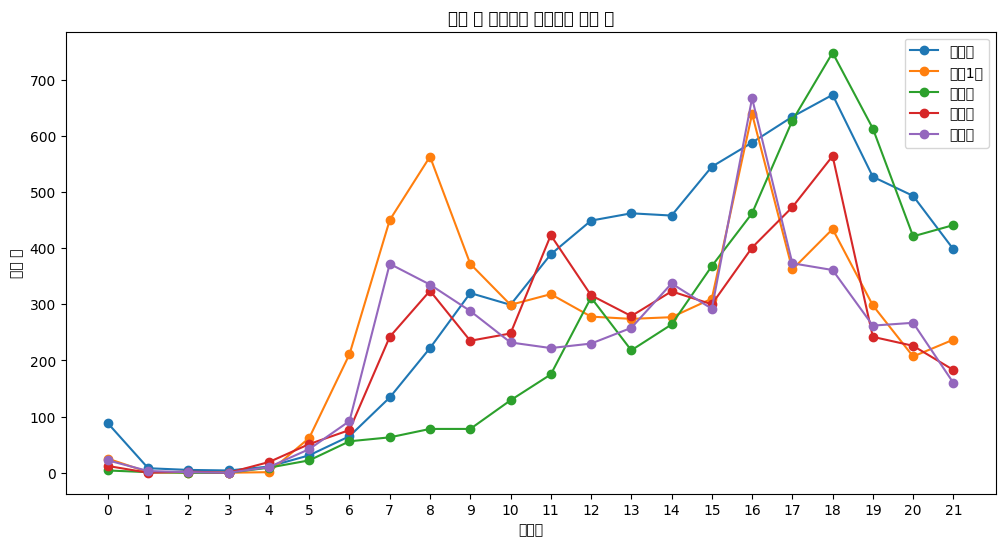

In [48]:
#이용자가 많은 5개의 행정동으로 시간대별 탑승 인원 그래프 
import pandas as pd
import matplotlib.pyplot as plt

rows_data = top_5_rows.loc[:, '승객_수_00':'승객_수_21']
plt.figure(figsize=(12, 6))

for row in rows_data.iterrows():
    row_values = row[1].values
    if pd.notnull(row_values).any():
        plt.plot(range(22), row_values, marker='o')
    
plt.title("다섯 개 행정동의 시간대별 승객 수")
plt.xlabel("시간대")
plt.ylabel("승객 수")

plt.xticks(range(22), labels=range(22))

# 범례 추가
plt.legend(top_5_rows['시작_행정동'])

# 그래프 출력
plt.show()

<br> 양재1동이 오전 7시부터 8시까지 출근 시간대 탑승 인원이 가장 많음
<br> 대학동이 오후 5시부터 7시까지 퇴근 시간대 탑승 인원이 가장 많음

C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph

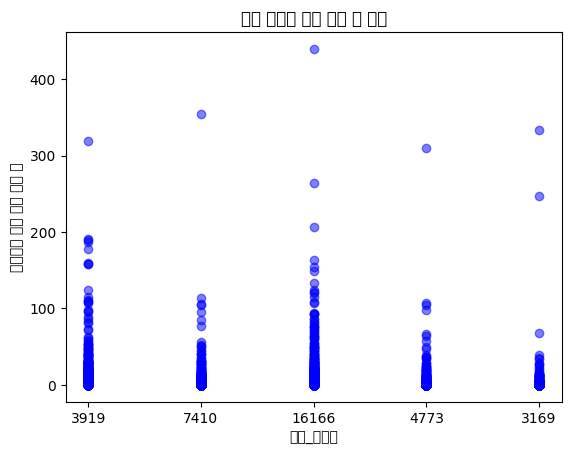

In [52]:
# 인구 밀도와 시간대별 평균 탑승 승객 수 추출
인구밀도 = sbp['인구밀도(명/㎢)']
평균탑승승객수 = sbp[['승객_수_07', '승객_수_08', '승객_수_09', '승객_수_10', '승객_수_11', '승객_수_12', '승객_수_13',
                 '승객_수_14', '승객_수_15', '승객_수_16', '승객_수_17', '승객_수_18', '승객_수_19', '승객_수_20', '승객_수_21']].mean(axis=1)

#top_5_rows에 있는 행정동 데이터 추출
top_5_data = sbp[sbp['시작_행정동'].isin(top_5_rows['시작_행정동'])]

# 행정동과 인구 밀도 매핑
density_mapping = {'서교동': 16166, '양재1동': 7410, '대학동': 3169, '여의동': 3919, '진관동': 4773 }

# 산점도 그래프 그리기
plt.scatter(top_5_data['인구밀도(명/㎢)'], top_5_data[['승객_수_07', '승객_수_08', '승객_수_09', '승객_수_10', '승객_수_11',
                                                    '승객_수_12', '승객_수_13', '승객_수_14', '승객_수_15', '승객_수_16', '승객_수_17',
                                                    '승객_수_18', '승객_수_19', '승객_수_20', '승객_수_21']].mean(axis=1),
            c='b', alpha=0.5) 
plt.xlabel('시작_행정동')
plt.ylabel('시간대별 평균 탑승 승객 수')
plt.title('인구 밀도와 탑승 승객 수 관계')
plt.show()

### 4. 결론
<br> 출근 시간대에 사람이 가장 많은 곳은 양재1동, 퇴근 시간대에 승객이 가장 많은 곳은 대학동이다. 지역별 특성이 영향을 끼치는 것 같다
<br> 평균 탑승 승객 수가 가장 많은 서교동은 인구 밀도도 가장 높다. 나머지 행정동들도 인구 밀도 수가 높은 순서대로 탑승 승객 수가 많았다. 인구 밀도 수가 높으면 평균 탑승 승객 수도 많아진다.

### 5. 개선사항
<br> 그래프에 한글이 뜨지 않은 점이 아쉬웠다. 한글이 뜨지 않으니 그래프가 제대로 나왔는지에 대해도 확인이 미숙했던 것 같다.
<br> 주제에 명확한 분석이었는지 확신이 조금 모자랐다. 다음 기회에 같은 분석을 하게 된다면 조금 더 연관성이 있는 데이터들을 모색하고 싶다.